<a href="https://colab.research.google.com/github/sohrabnamazinia/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import section

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

## Get Dataset

First, you need to download the Loan Status dataset via the following link:

[Dataset Link](https://www.kaggle.com/datasets/zaurbegiev/my-dataset/data)

Then, go to your google drive (with the same account that you open this google colab), create a folder called "datasets", and upload the two downloaded csv files "credit_train.csv" and "credit_test.csv" in that folder.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("drive/MyDrive/dataset/credit_train.csv")
df_test = pd.read_csv("drive/MyDrive/dataset/credit_test.csv")

## Dataset General Information

In [ ]:
print("Train data shape (number of items, number of attributes): \n", df_train.shape)
print("Test data shape (number of items, number of attributes): \n", df_test.shape)

Train data shape (number of items, number of attributes): 
 (100514, 19)
Test data shape (number of items, number of attributes): 
 (10353, 18)


In [ ]:
print("Dataset attributes:\n")
print(df_train.columns)
print("\nDataset Information:\n")
df_train.info()

Dataset attributes:

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  o

In [ ]:
print("A few samples of the dataset:\n")
df_train.head()

A few samples of the dataset:



,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
print("General information about the range of the values of each attribute:\n")
df_train.describe().T.style.background_gradient(cmap="Greens")

General information about the range of the values of each attribute:



,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.000000,11760447.389460,31783942.546075,10802.000000,179652.000000,312246.000000,524942.000000,99999999.000000
Credit Score,80846.000000,1076.456089,1475.403791,585.000000,705.000000,724.000000,741.000000,7510.000000
Annual Income,80846.000000,1378276.559842,1081360.195662,76627.000000,848844.000000,1174162.000000,1650663.000000,165557393.000000
Monthly Debt,100000.000000,18472.412336,12174.992609,0.000000,10214.162500,16220.300000,24012.057500,435843.280000
Years of Credit History,100000.000000,18.199141,7.015324,3.600000,13.500000,16.900000,21.700000,70.500000
Months since last delinquent,46859.000000,34.901321,21.997829,0.000000,16.000000,32.000000,51.000000,176.000000
Number of Open Accounts,100000.000000,11.128530,5.009870,0.000000,8.000000,10.000000,14.000000,76.000000
Number of Credit Problems,100000.000000,0.168310,0.482705,0.000000,0.000000,0.000000,0.000000,15.000000
Current Credit Balance,100000.000000,294637.382350,376170.934666,0.000000,112670.000000,209817.000000,367958.750000,32878968.000000
Maximum Open Credit,99998.000000,760798.381748,8384503.472368,0.000000,273438.000000,467874.000000,782958.000000,1539737892.000000


## Finding Dataset Issues

Usually there are missing values at the end of a dataset. Hence, we should check that too.

In [ ]:
df_train.tail(516)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like the last 514 rows are empty, but we need to check if it is true for all the attributes.

In [ ]:
last_nan = df_train.iloc[100000:]
last_nan.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

Hence, the last 514 items of the train data are empty and needs to be dropped.

In [ ]:
df_train.describe(include="O").T

,count,unique,top,freq
Loan ID,100000,81999,14dd8831-6af5-400b-83ec-68e61888a048,2
Customer ID,100000,81999,981165ec-3274-42f5-a3b4-d104041a9ca9,2
Loan Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208
Years in current job,95778,11,10+ years,31121
Home Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552


Looks like there is a duplicate because the loan ID must be unique. Hence, we will check the frequency of each attribute.

In [ ]:
print("Number of unique values for each attribute:\n")
df_train.nunique()

Number of unique values for each attribute:



Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

Hence, there are duplicates that needs to be removed

In [ ]:
def compute_missing_percentage(df):
    names=df.columns
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))*100
    missing_data = pd.DataFrame({'Total':total,'Percent':percent})
    return missing_data

missing_values = compute_missing_percentage(df_train)
missing_values.head(8)

,Total,Percent
Months since last delinquent,53655,53.380624
Credit Score,19668,19.567423
Annual Income,19668,19.567423
Years in current job,4736,4.711781
Bankruptcies,718,0.714328
Tax Liens,524,0.521320
Maximum Open Credit,516,0.513361
Years of Credit History,514,0.511372


Hence, it is recommended to drop Months last delinquent because of its many missing values.

## Data Cleaning

First, I create variable names for each attribute to avoid further typos

In [ ]:
df_train.columns = df_train.columns.str.lower()
attribute_loan_id = 'loan id'
attribute_customer_id = 'customer id'
attribute_loan_status = 'loan status'
attribute_current_loan_amount = 'current loan amount'
attribute_term = 'term'
attribute_credit_score = 'credit score'
attribute_annual_income = 'annual income'
attribute_years_in_current_job = 'years in current job'
attribute_home_ownership = 'home ownership'
attribute_purpose = 'purpose'
attribute_monthly_debt = 'monthly debt'
attribute_years_of_credit_history = 'years of credit history'
attribute_months_since_last_delinquent = 'months since last delinquent'
attribute_number_of_open_accounts = 'number of open accounts'
attribute_number_of_credit_problems = 'number of credit problems'
attribute_current_credit_balance = 'current credit balance'
attribute_maximum_open_credit = 'maximum open credit'
attribute_bankruptcies = 'bankruptcies'
attribute_tax_liens = 'tax liens'

In [ ]:
duplicated_data = df_train.duplicated().sum()
print("%", (duplicated_data /len(df_train)) * 100, " of the data are duplicates!")

% 10.67314006009113  of the data are duplicates!


In [ ]:
df_train.drop_duplicates(inplace = True)
duplicated_data_after = df_train.duplicated().sum()
print("After removing duplicates, %", (duplicated_data_after /len(df_train)) * 100, " of the data are duplicates!")

After removing duplicates, % 0.0  of the data are duplicates!


In [ ]:
df_train = df_train.drop(columns=[attribute_loan_id, attribute_customer_id, attribute_months_since_last_delinquent])

Now, we need to handle missing values of credit score and annual income.

For each, we fill them with their corresponding average for the same loan status as them

In [ ]:
df_train[attribute_credit_score] = df_train[attribute_credit_score].fillna(df_train[attribute_credit_score].groupby(df_train[attribute_loan_status]).transform('mean'))
df_train[attribute_annual_income] = df_train[attribute_annual_income].fillna(df_train[attribute_annual_income].groupby(df_train[attribute_loan_status]).transform('mean'))

Here, I have handled the missing values of "Years in current job" and also made its values as integers to be more well-defined

In [ ]:
new_years_in_current_job = [i for i in range(11)]
df_train[attribute_years_in_current_job]=df_train[attribute_years_in_current_job].replace(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'], new_years_in_current_job)
most_frequent_years_in_current_job = df_train[attribute_years_in_current_job].mode().iloc[0]
df_train[attribute_years_in_current_job].fillna(value=most_frequent_years_in_current_job, inplace=True)

Hence, we need to handle missing value from this attribute as well.

In [ ]:
df_train[attribute_bankruptcies].unique()
most_frequent_bankcruptcies = df_train[attribute_bankruptcies].mode().iloc[0]
df_train[attribute_bankruptcies].fillna(value=most_frequent_bankcruptcies, inplace=True)

In [ ]:
df_train.dropna(inplace=True)

Also, the "Purpose" categorical attribute has too many categories that makes learning them practically too hard. Hence, we can merge the close ones together as follows.

In [ ]:
df_train[attribute_purpose] = df_train[attribute_purpose].replace({"other" : "Other", "moving" : "Personal",
                                                       "Educational Expenses" : "Personal", "wedding" : "Personal",
                                                       "Medical Bills" : "Personal", "Buy a Car" : "Personal",
                                                       "Buy House" : "Personal", "Home Improvements" : "Personal",
                                                       "Take a Trip" : "Personal", "vacation" : "Personal",
                                                       "major_purchase" : "Personal", "small_business" : "Personal"})

In [ ]:
df_train.isna().sum()

loan status                  0
current loan amount          0
term                         0
credit score                 0
annual income                0
years in current job         0
home ownership               0
purpose                      0
monthly debt                 0
years of credit history      0
number of open accounts      0
number of credit problems    0
current credit balance       0
maximum open credit          0
bankruptcies                 0
tax liens                    0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

No duplicates, no missing values, all filled with appropiate values or dropped.

hence, the dataset is ready!

For further simplicity, we can make all attributes lower case for the next steps

In [ ]:
df_train.columns = df_train.columns.str.lower()

## Dataset info after cleaning

In [ ]:
print("Dataset shape after cleaning: \n", df_train.shape)

print("Dataset attributes: \n", df_train.columns)

Dataset shape after cleaning: 
 (89774, 16)
Dataset attributes: 
 Index(['loan status', 'current loan amount', 'term', 'credit score',
       'annual income', 'years in current job', 'home ownership', 'purpose',
       'monthly debt', 'years of credit history', 'number of open accounts',
       'number of credit problems', 'current credit balance',
       'maximum open credit', 'bankruptcies', 'tax liens'],
      dtype='object')


In [ ]:
categorical_attributes = df_train.select_dtypes(include=['object']).columns.tolist()
print(categorical_attributes)


['loan status', 'term', 'home ownership', 'purpose']


In [ ]:
print("Values for each categorical attribute:\n")
print("loan status:\n", df_train[attribute_loan_status].unique())
print("term:\n", df_train[attribute_term].unique())
print("home ownership:\n", df_train[attribute_home_ownership].unique())
print("purpose:\n", df_train[attribute_purpose].unique())

Values for each categorical attribute:

loan status:
 ['Fully Paid' 'Charged Off']
term:
 ['Short Term' 'Long Term']
home ownership:
 ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
purpose:
 ['Personal' 'Debt Consolidation' 'Other' 'Business Loan'
 'renewable_energy']


## Visualization

Let's first have a complete pairwise plot of attributes

<Figure size 2000x1000 with 0 Axes>

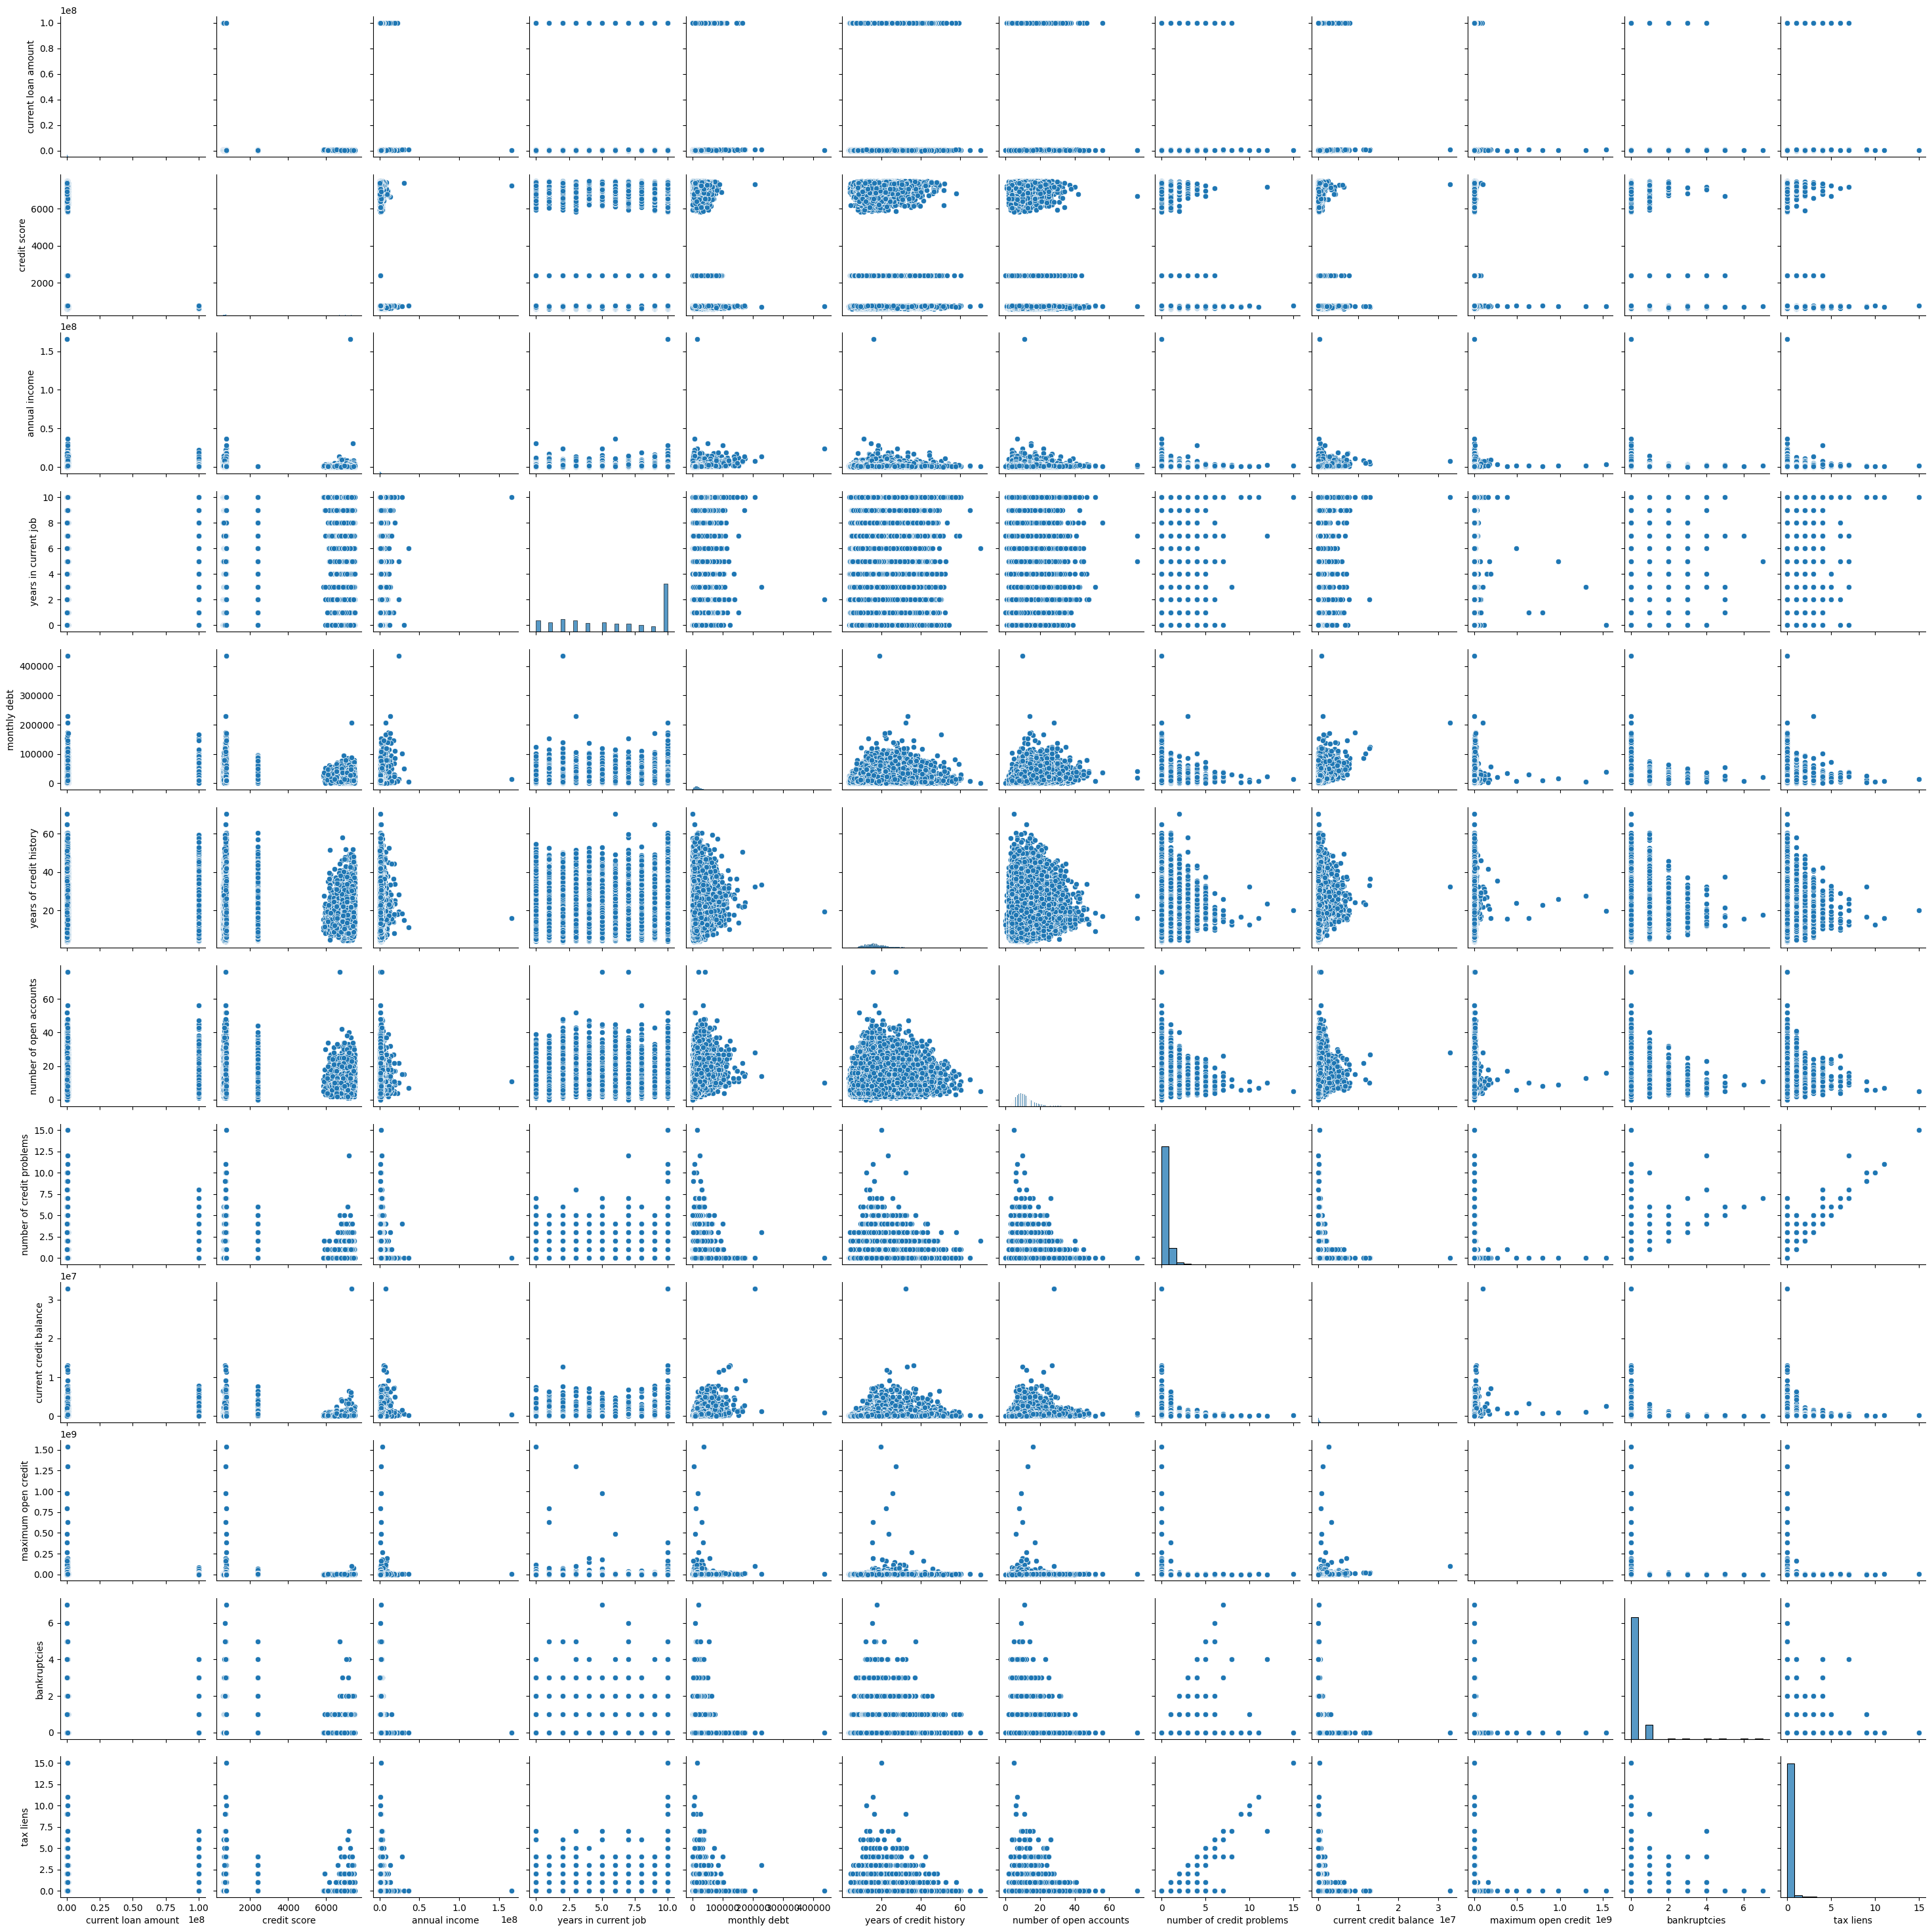

In [ ]:
plt.figure(figsize = (20,10))
sns.pairplot(df_train)
plt.show();

Let's also see the correlation matrix of the numeric columns as a heatmap

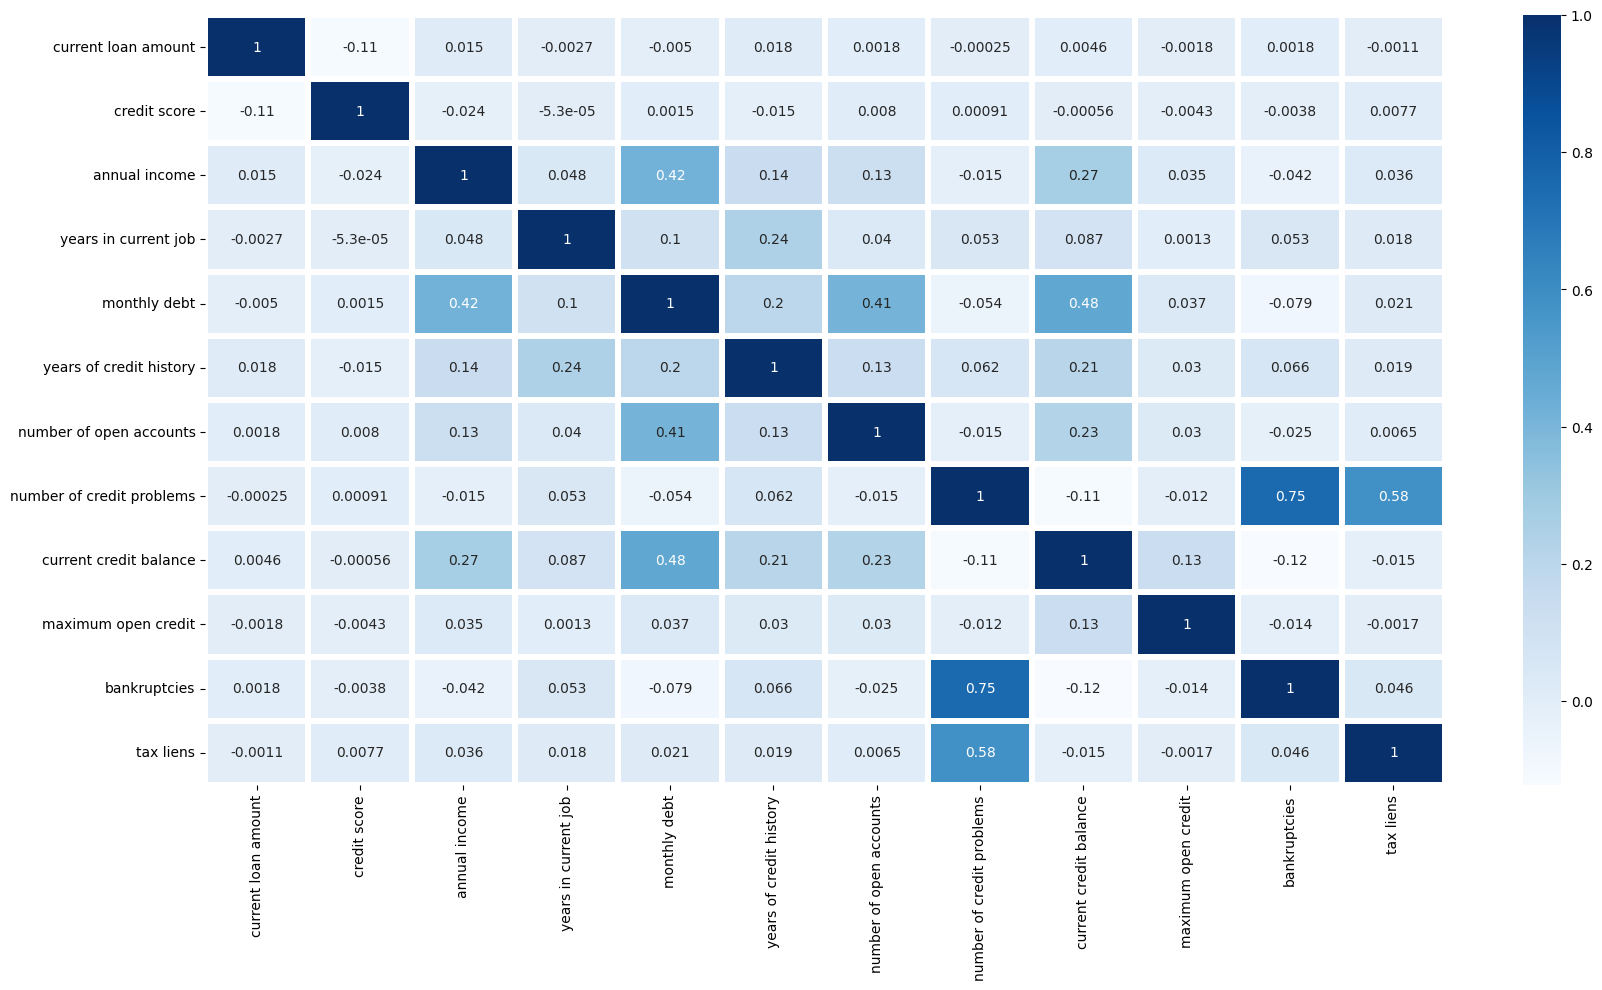

In [ ]:
plt.figure(figsize = (20,10))
numeric_columns = df_train.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_columns.corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()

Now, let's also have a look at the distribution of some of the attributes independently. Specifically, we will see normal and skewed distribution of the attributes.

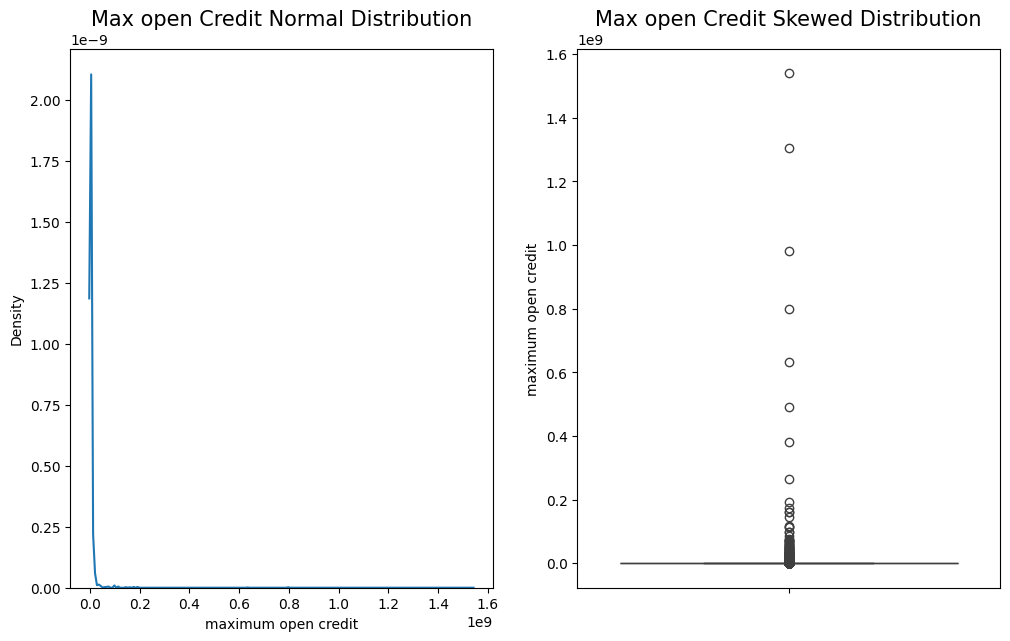

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Max open Credit Normal Distribution", fontsize=15)
sns.kdeplot(data = df_train[attribute_maximum_open_credit])
plt.subplot(1,2,2)
plt.title("Max open Credit Skewed Distribution", fontsize=15)
sns.boxplot(data = df_train[attribute_maximum_open_credit])
plt.show()

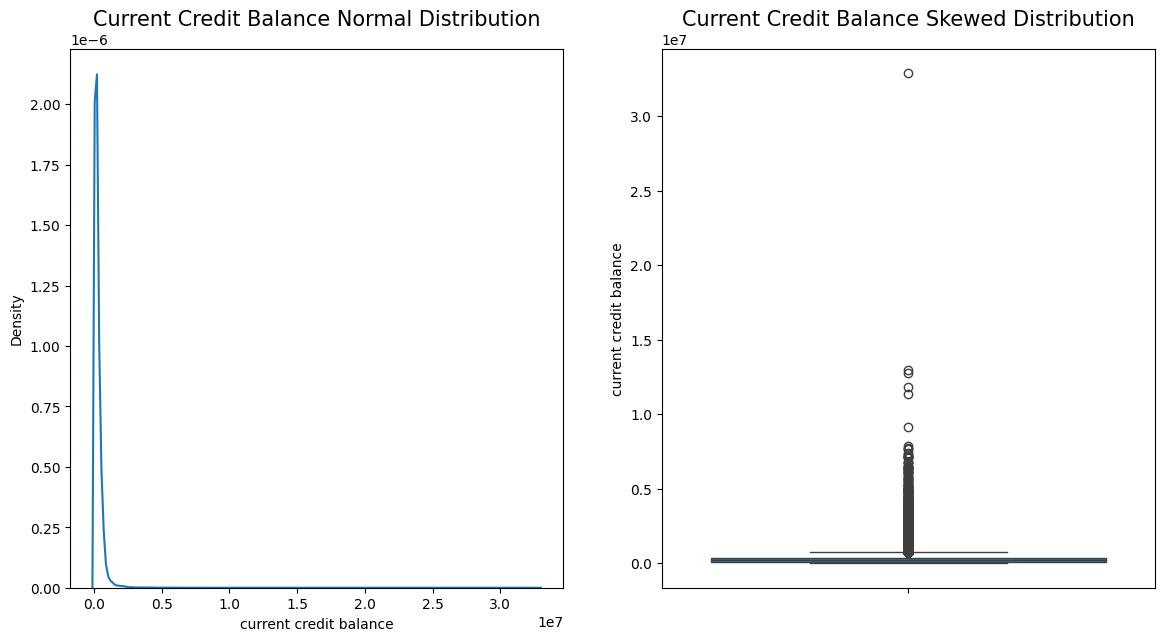

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Current Credit Balance Normal Distribution", fontsize=15)
sns.kdeplot(data = df_train[attribute_current_credit_balance])
plt.subplot(1,2,2)
plt.title("Current Credit Balance Skewed Distribution", fontsize=15)
sns.boxplot(data = df_train[attribute_current_credit_balance])
plt.show()

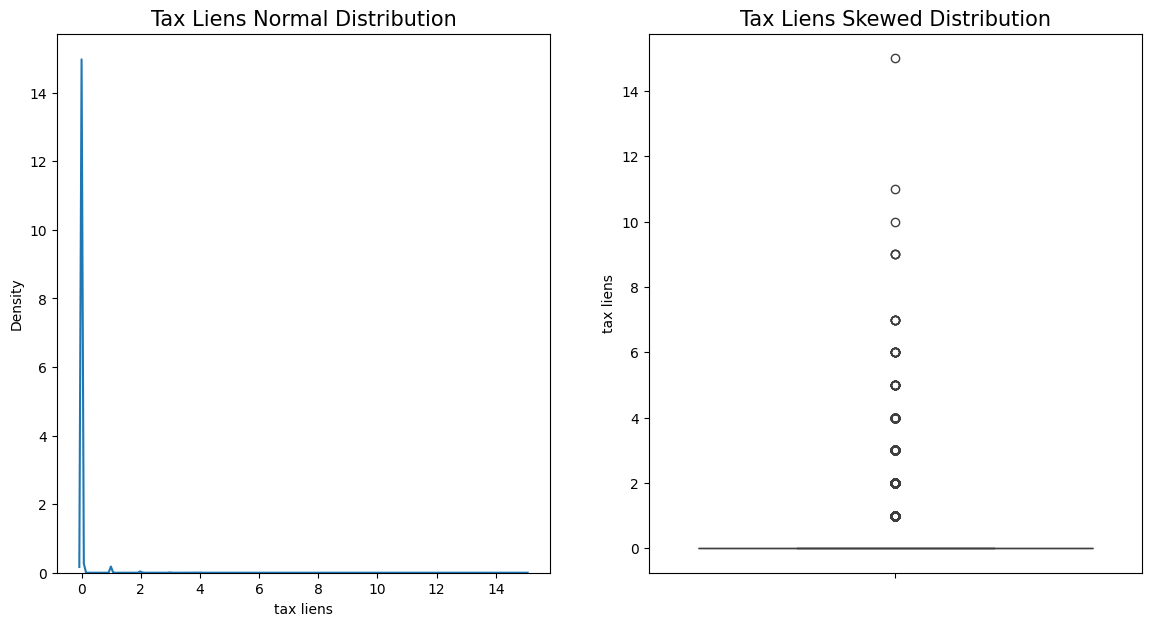

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Tax Liens Normal Distribution", fontsize=15)
sns.kdeplot(data = df_train[attribute_tax_liens])
plt.subplot(1,2,2)
plt.title("Tax Liens Skewed Distribution", fontsize=15)
sns.boxplot(data = df_train[attribute_tax_liens])
plt.show()

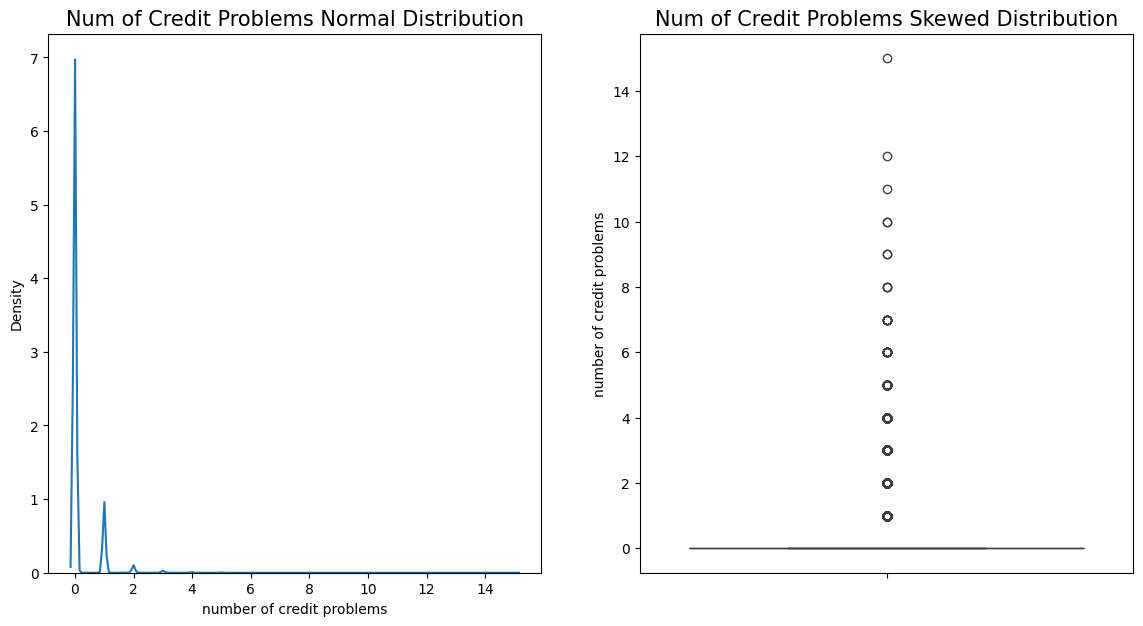

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Num of Credit Problems Normal Distribution", fontsize=15)
sns.kdeplot(data = df_train[attribute_number_of_credit_problems])
plt.subplot(1,2,2)
plt.title("Num of Credit Problems Skewed Distribution", fontsize=15)
sns.boxplot(data = df_train[attribute_number_of_credit_problems])
plt.show()

Now, let's explore some relationships for categorical attributes

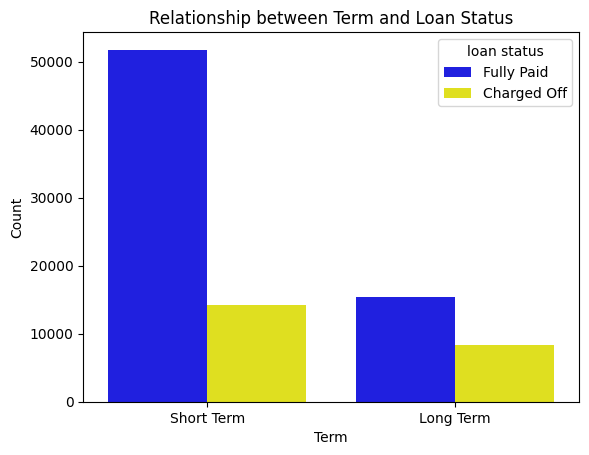

In [ ]:
sns.set_palette(['blue','yellow'])
sns.countplot(x= attribute_term, hue = attribute_loan_status, data = df_train)
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Relationship between Term and Loan Status')
plt.show()

Text(0.5, 1.0, 'Relationship between Years in Current Job and Loan Status')

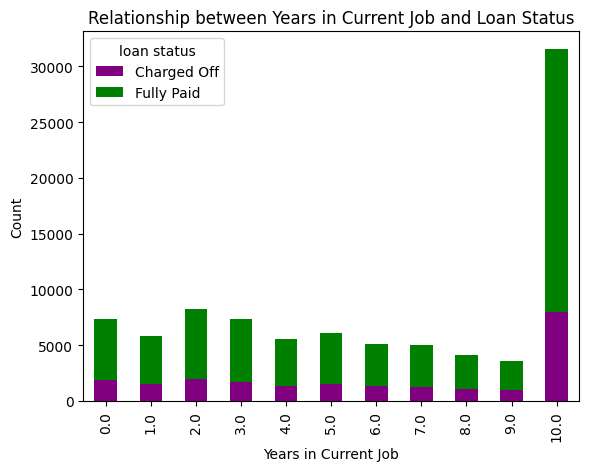

In [ ]:
ct = pd.crosstab(df_train[attribute_years_in_current_job], df_train[attribute_loan_status])
ct.plot(kind='bar', stacked=True , color=['purple','green'])
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.title('Relationship between Years in Current Job and Loan Status')

Now, plotting boxplots to help have a general idea of potential outliers

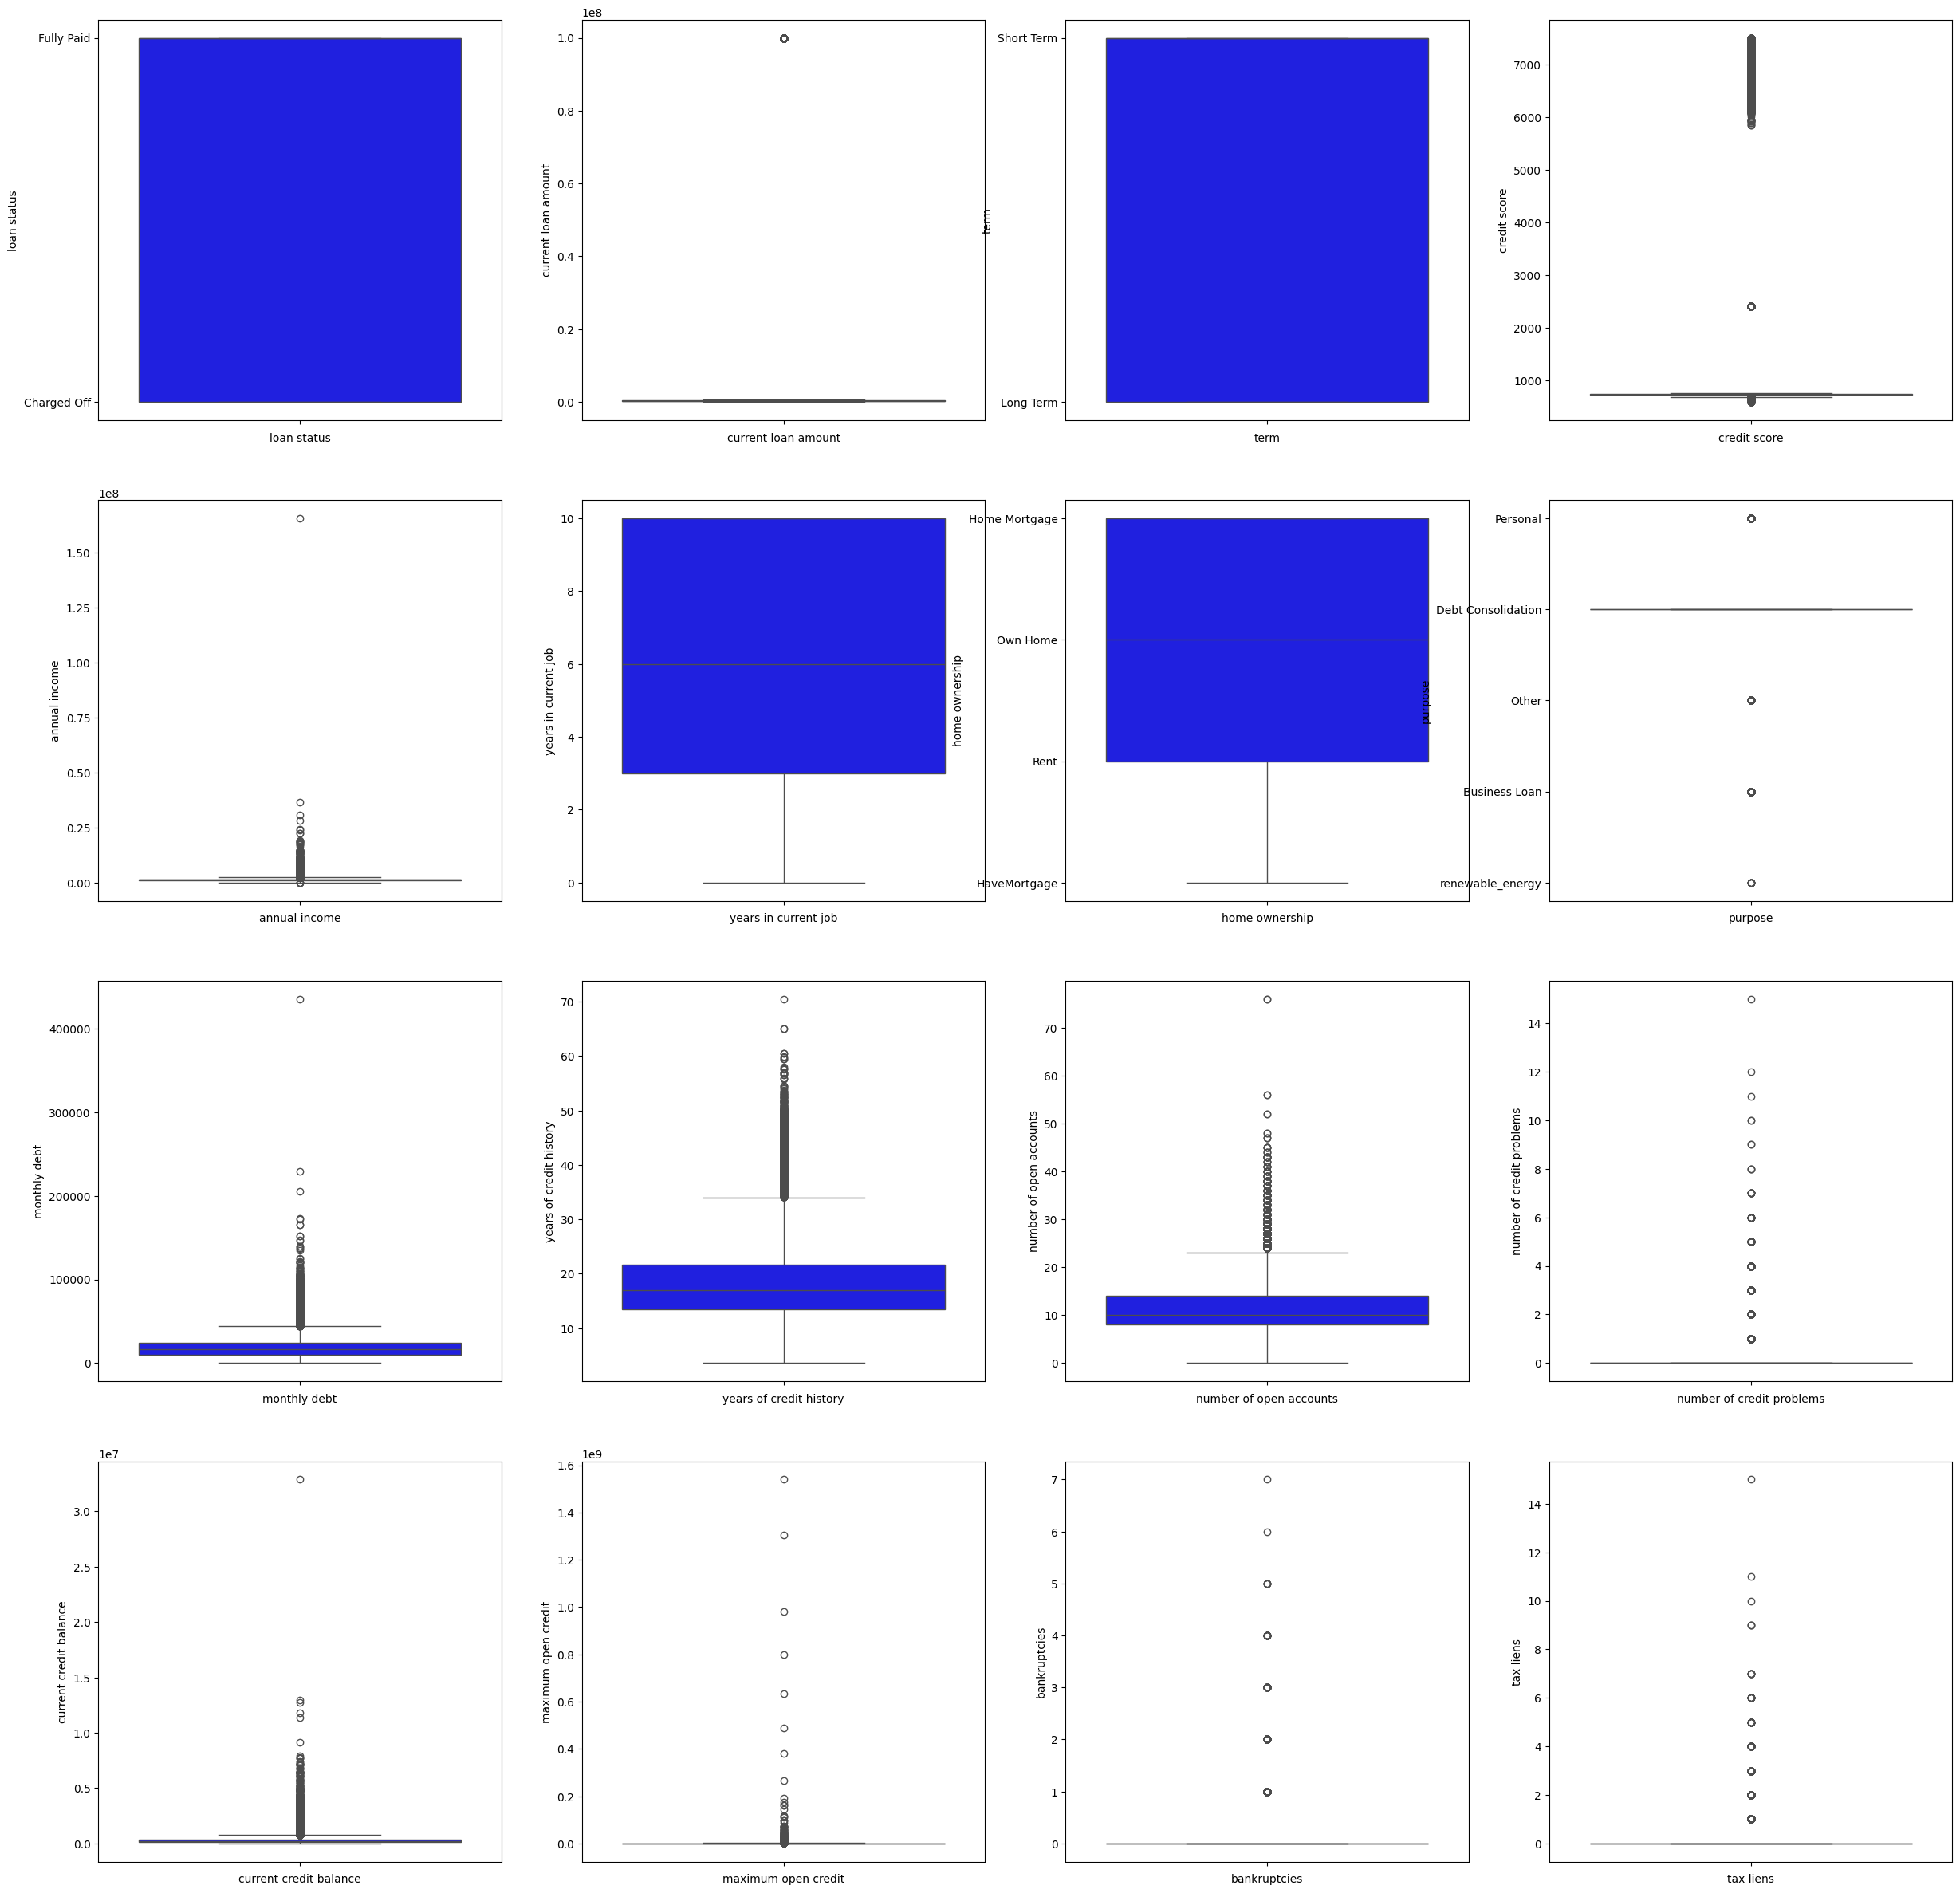

In [ ]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in df_train.columns:
    sub = fig.add_subplot(4,4,counter+1)
    g = sns.boxplot(data = df_train[col])
    plt.xlabel(col)
    counter = counter + 1

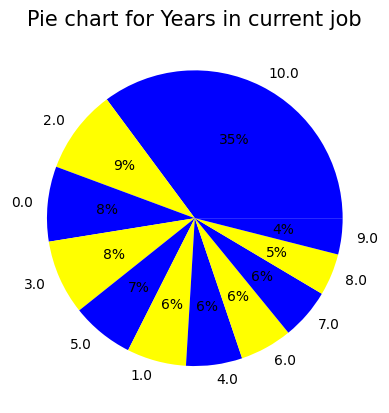

In [ ]:
df_train[attribute_years_in_current_job].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Pie chart for Years in current job', fontsize=15)
plt.ylabel('');

The class is partially imbalance since %75 of the loans are fully paid

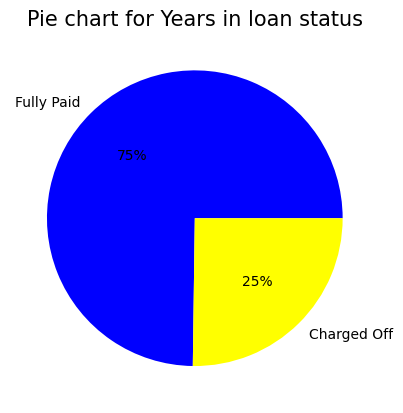

In [ ]:
df_train[attribute_loan_status].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Pie chart for Years in loan status', fontsize=15)
plt.ylabel('');

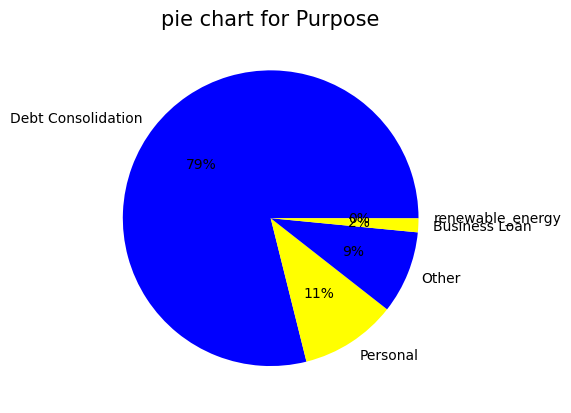

In [ ]:
df_train[attribute_purpose].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('pie chart for Purpose', fontsize=15)
plt.ylabel('');

## Pre-Processing

Now, its time to encode target and categorical variables

In [ ]:
df_train.head()

,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
0,Fully Paid,445412.0,Short Term,709.00000,1.167493e+06,8.0,Home Mortgage,Personal,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,721.21763,1.410721e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.00000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.00000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,721.21763,1.410721e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
le = LabelEncoder()
df_train[attribute_loan_status] = le.fit_transform(df_train[attribute_loan_status])
df_train[attribute_term] = le.fit_transform(df_train[attribute_term])
df_train[attribute_home_ownership] = le.fit_transform(df_train[attribute_home_ownership])
df_train[attribute_purpose] = le.fit_transform(df_train[attribute_purpose])

In [ ]:
df_train.head()

,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
0,1,445412.0,1,709.00000,1.167493e+06,8.0,1,3,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,721.21763,1.410721e+06,10.0,1,1,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.00000,2.231892e+06,8.0,2,1,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.00000,8.069490e+05,3.0,2,1,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,721.21763,1.410721e+06,5.0,3,1,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


Now, we need to make numerical attributes within a limited range (a typ of normalization) so that training can occur more smoothly, and convergence happens faster.

In [ ]:
rescale_columns = [attribute_current_loan_amount, attribute_credit_score, attribute_annual_income, attribute_monthly_debt,
                   attribute_years_of_credit_history, attribute_number_of_open_accounts, attribute_current_credit_balance,
                   attribute_maximum_open_credit, attribute_years_in_current_job]

sc = StandardScaler()
df_train[rescale_columns] = sc.fit_transform(df_train[rescale_columns])

In [ ]:
df_train.head()

,loan status,current loan amount,term,credit score,annual income,years in current job,home ownership,purpose,monthly debt,years of credit history,number of open accounts,number of credit problems,current credit balance,maximum open credit,bankruptcies,tax liens
0,1,-0.378905,1,-0.303477,-0.211331,0.534183,1,3,-1.085478,-0.149018,-1.024881,1.0,-0.176882,-0.040632,1.0,0.0
1,1,-0.384403,1,-0.294974,0.036750,1.082343,1,1,1.226675,0.405376,4.776411,0.0,-0.172084,0.008923,0.0,0.0
2,1,2.611094,1,-0.281207,0.874304,0.534183,2,1,0.889464,-0.475969,1.375654,1.0,0.010662,-0.002574,0.0,0.0
3,1,-0.381840,0,-0.295126,-0.579069,-0.836216,2,1,-0.795058,-0.888211,-0.424748,0.0,-0.101283,-0.044033,0.0,0.0
4,1,-0.386989,1,-0.294974,0.036750,-0.288056,3,1,0.184582,-1.726910,0.775520,0.0,-0.108991,-0.039441,0.0,0.0


Now, let's split the target variable from the features

In [ ]:
X = df_train.drop(attribute_loan_status, axis=1)
y = df_train[attribute_loan_status]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Now, let's sort the features based on their effect/importance because we might further need to prune some of them to avoid overfitting.

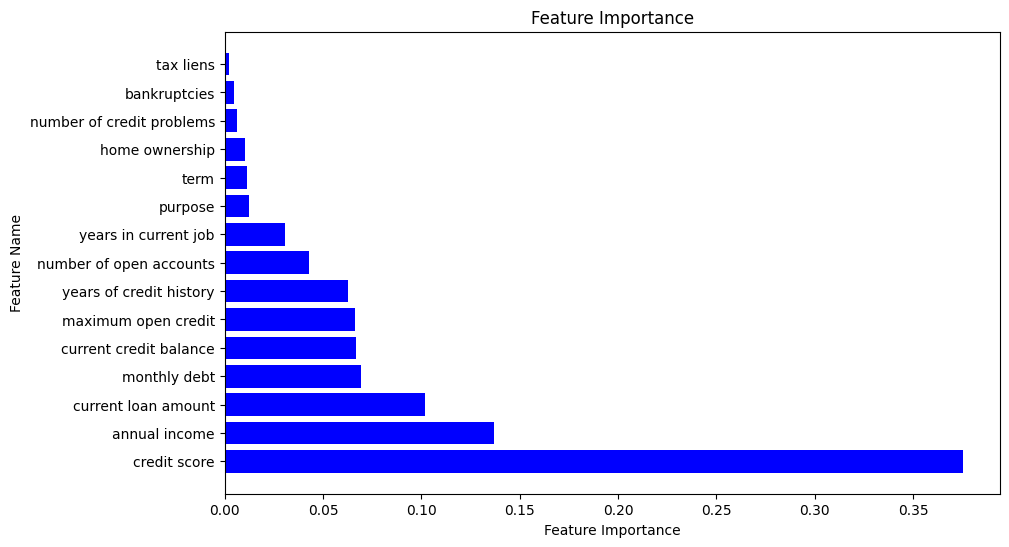

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

Now, let's fit the models and do the training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

## Model training and evaluation

In [ ]:
def cross_val(model):
    accuracies=cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    return accuracies.mean() * 100

def fit_evaluate(model, X_train, y_train, X_test, y_test):
    name=model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cross= cross_val(model)
    a_s=accuracy_score(y_test,y_pred) * 100
    pre_sc=precision_score(y_test,y_pred) * 100
    rec_sc=recall_score(y_test,y_pred) * 100
    f1_sc=f1_score(y_test,y_pred) * 100
    roc_sc=roc_auc_score(y_test,y_pred) * 100
    result=pd.DataFrame([[name,cross,a_s,pre_sc,rec_sc,f1_sc,roc_sc]],columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
    return result

In [ ]:
models = [LogisticRegression(), XGBClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]
result_models=pd.DataFrame(columns=['model','accuracy_train_cv','accuracy_test','precision_score','recall_score','f1_score','roc_auc_score'])
for model in models:
 results = fit_evaluate(model, X_train, y_train, X_test, y_test)
 result_models=pd.concat([result_models,results])
result_models.sort_values(by='recall_score',ascending=False)

,model,accuracy_train_cv,accuracy_test,precision_score,recall_score,f1_score,roc_auc_score
0,LogisticRegression,85.897879,85.808967,84.059604,99.985106,91.333333,71.872385
0,GradientBoostingClassifier,85.913194,85.859092,84.162640,99.888293,91.353652,72.066965
0,AdaBoostClassifier,85.904839,85.803397,84.204238,99.724456,91.309536,72.117585
0,RandomForestClassifier,85.808767,85.730994,84.412212,99.247840,91.230832,72.442564
0,XGBClassifier,85.523327,85.625174,84.830775,98.369080,91.099693,73.096623
0,KNeighborsClassifier,83.720187,83.386243,84.496995,95.263628,89.557881,71.709570
0,DecisionTreeClassifier,79.093273,78.891674,86.342383,85.262139,85.798861,72.628860


Lets compare these models accuracy on train and test data

<ipython-input-85-7ace396792ee>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: xlabel='model', ylabel='accuracy_train_cv'>

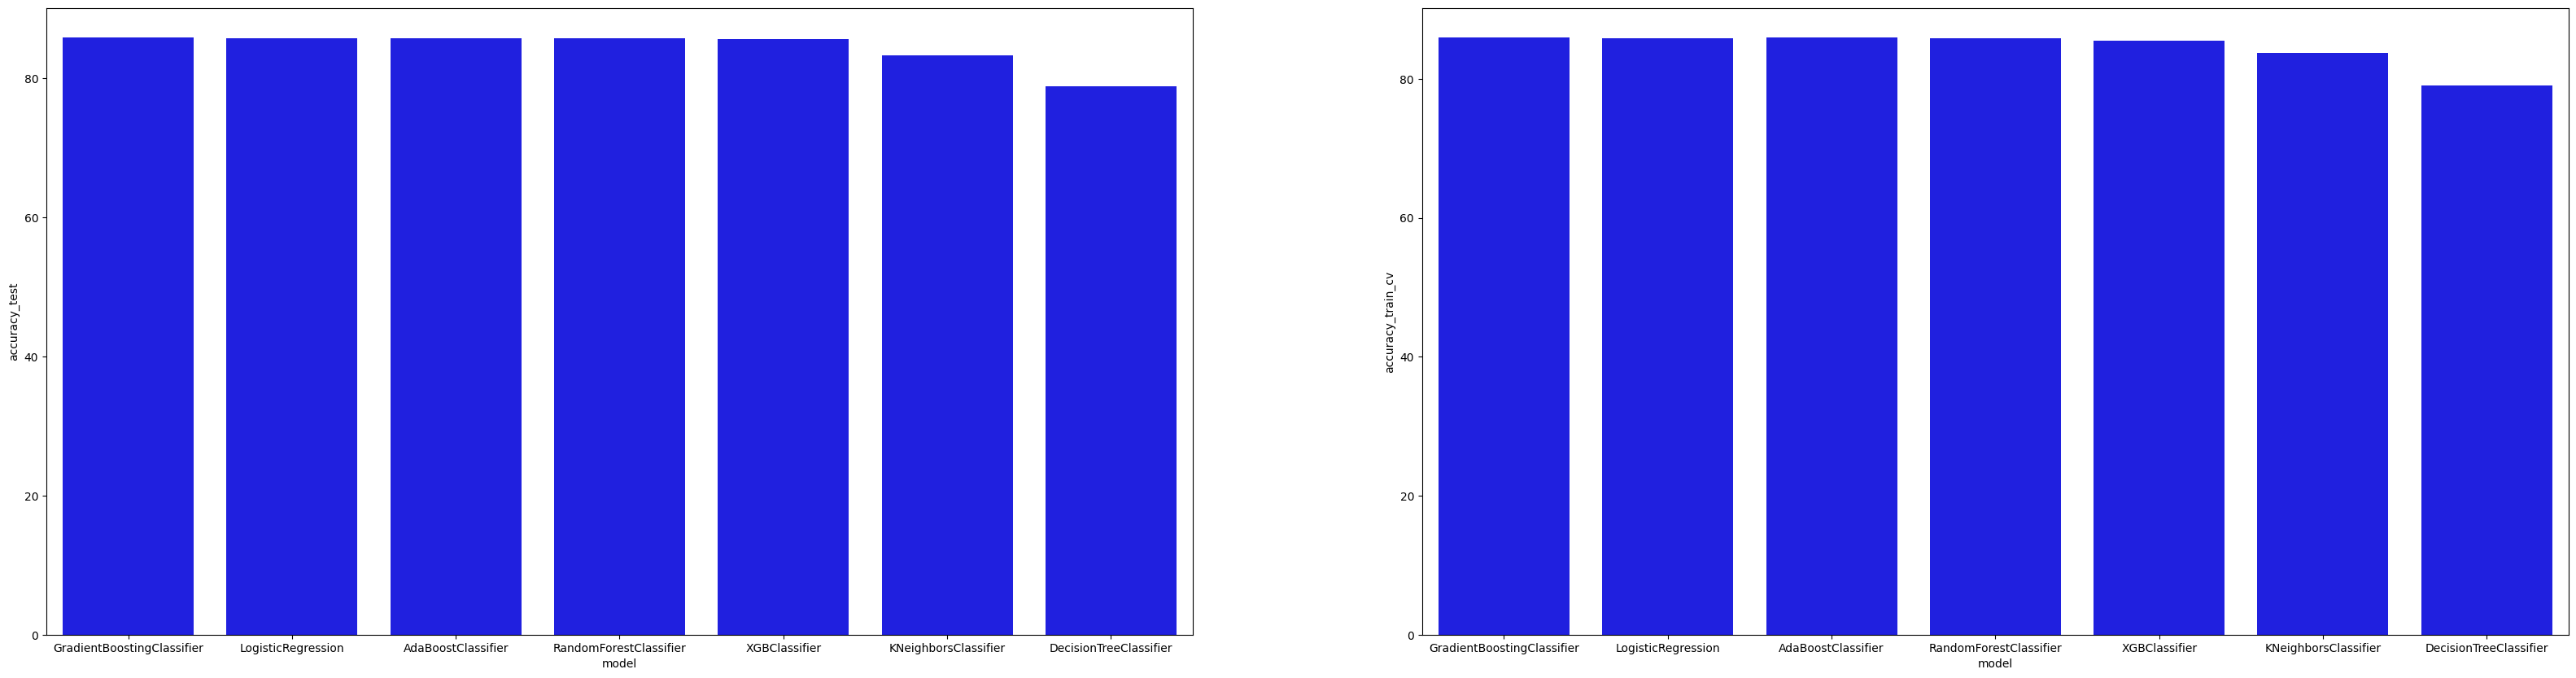

In [ ]:
plt.subplots(figsize=(40,10))
plt.subplot(1,2,1)
sns.barplot(y='accuracy_test',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))
plt.subplot(1,2,2)
sns.barplot(y='accuracy_train_cv',x='model',data=result_models.sort_values(by='accuracy_test',ascending=False))

Now, let's draw the confusion matrix for the logistic regression model

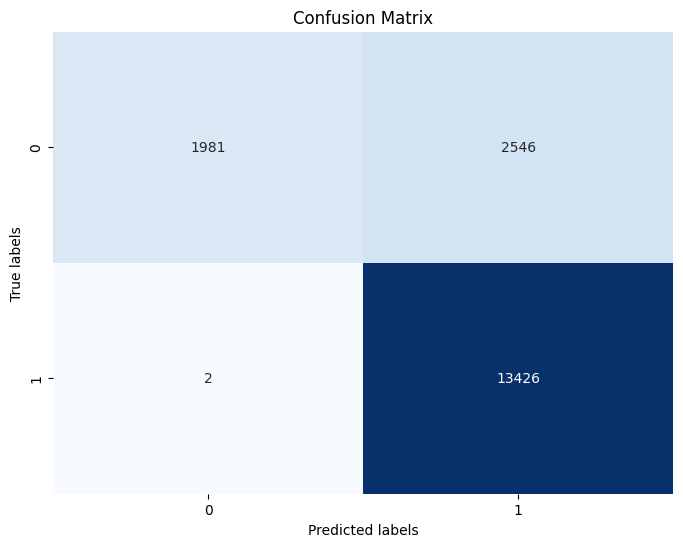

In [ ]:
conf_matrix = confusion_matrix(y_test, models[0].predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Now, let's sort all the models based on each evaluation metric

In [ ]:
metrics = ['accuracy_train_cv', 'accuracy_test', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']


for metric in metrics:

    sorted_results = result_models.sort_values(by=metric, ascending=False)

    rankings = sorted_results.reset_index(drop=True).reset_index().rename(columns={'i in the usual indigestionndex': 'rank'})

    print(f"Ranking for {metric}:")
    for index, row in rankings.iterrows():
        print(f"{row['rank'] + 1}. {row['model']}: {row[metric]:.2f}")
    print()


Ranking for accuracy_train_cv:
1. GradientBoostingClassifier: 85.91
2. AdaBoostClassifier: 85.90
3. LogisticRegression: 85.90
4. RandomForestClassifier: 85.81
5. XGBClassifier: 85.52
6. KNeighborsClassifier: 83.72
7. DecisionTreeClassifier: 79.09

Ranking for accuracy_test:
1. GradientBoostingClassifier: 85.86
2. LogisticRegression: 85.81
3. AdaBoostClassifier: 85.80
4. RandomForestClassifier: 85.73
5. XGBClassifier: 85.63
6. KNeighborsClassifier: 83.39
7. DecisionTreeClassifier: 78.89

Ranking for precision_score:
1. DecisionTreeClassifier: 86.34
2. XGBClassifier: 84.83
3. KNeighborsClassifier: 84.50
4. RandomForestClassifier: 84.41
5. AdaBoostClassifier: 84.20
6. GradientBoostingClassifier: 84.16
7. LogisticRegression: 84.06

Ranking for recall_score:
1. LogisticRegression: 99.99
2. GradientBoostingClassifier: 99.89
3. AdaBoostClassifier: 99.72
4. RandomForestClassifier: 99.25
5. XGBClassifier: 98.37
6. KNeighborsClassifier: 95.26
7. DecisionTreeClassifier: 85.26

Ranking for f1_scor

## Fine-tuning

Finally, let's do fine-tuning on the logistic regression model as one of the best ones

In [ ]:
weights = np.linspace(0.01,0.99,100)
lr_param_dist = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class':['auto', 'ovr'],
    'class_weight' : [{0:x, 1:1.0-x} for x in weights]
}
random_search = RandomizedSearchCV(
    estimator=models[0],
    param_distributions=lr_param_dist,
    n_iter=5,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'class_weight': [{0: 0.01, 1: 0.99},
                                                         {0: 0.0198989898989899,
                                                          1: 0.9801010101010101},
                                                         {0: 0.029797979797979796,
                                                          1: 0.9702020202020202},
                                                         {0: 0.039696969696969696,
                                                          1: 0.9603030303030303},
                                                         {0: 0.049595959595959596,
                                                          1: 0.9504040404040404},
                                                         {0: 0.059494949494949496,
                                                          1: 0.9405050505050505},
                                                         {0: 0....
                                                          1: 0.7425252525252526},
                                                         {0: 0.2673737373737374,
                                                          1: 0.7326262626262626},
                                                         {0: 0.2772727272727273,
                                                          1: 0.7227272727272727},
                                                         {0: 0.2871717171717172,
                                                          1: 0.7128282828282828},
                                                         {0: 0.29707070707070704,
                                                          1: 0.702929292929293}, ...],
                                        'multi_class': ['auto', 'ovr'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
best_params = random_search.best_params_
logistic_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", logistic_model.score(X_valid, y_valid))

Best Parameters: {'solver': 'newton-cg', 'multi_class': 'ovr', 'class_weight': {0: 0.7128282828282828, 1: 0.2871717171717172}}
Best Model Score: 0.8312447786131997


Altogether, it looks like AdaBoostClassifier, GradientBoostingClassifier, and logistic regression have obtained the best results.Their results are so close and fine-tuning was not that much impactful on the result. Since   F1-score is a combination of both precision and recall, and GradientBoostingClassifier has the highest value of this metric, we can pick it ass the best model.